# Machine Learning Foundation

## Section 2, Part d:  Regularization and Gradient Descent


## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`.


# Mathematical Formulas for Regularization and Gradient Descent

This notebook demonstrates regularization techniques including Ridge, Lasso, and Elastic Net regression, along with gradient descent optimization. Below are the mathematical foundations for all methods used:

## 1. Linear Regression Fundamentals

### Simple Linear Regression
$$y = \beta_0 + \beta_1 x + \varepsilon$$

### Multiple Linear Regression
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

Where:
- $\mathbf{y}$ : Target vector ($n \times 1$)
- $\mathbf{X}$ : Feature matrix ($n \times p$)
- $\boldsymbol{\beta}$ : Coefficient vector ($p \times 1$)
- $\boldsymbol{\varepsilon}$ : Error vector ($n \times 1$)

### Ordinary Least Squares (OLS) Solution
$$\hat{\boldsymbol{\beta}}_{\text{OLS}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

**Objective Function:**
$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 = \min_{\boldsymbol{\beta}} \sum_{i=1}^n (y_i - \mathbf{x}_i^T \boldsymbol{\beta})^2$$

## 2. Regularization Overview

Regularization adds a penalty term to the OLS objective to prevent overfitting and improve generalization.

### General Regularized Objective
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \cdot \text{Penalty}(\boldsymbol{\beta})$$

Where:
- $\lambda \geq 0$ : Regularization parameter (controls penalty strength)
- Higher $\lambda$ → More regularization → Simpler model
- Lower $\lambda$ → Less regularization → More complex model

## 3. Ridge Regression (L2 Regularization)

### Ridge Objective Function
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2$$

**Expanded Form:**
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\sum_{i=1}^n (y_i - \mathbf{x}_i^T \boldsymbol{\beta})^2 + \lambda \sum_{j=1}^p \beta_j^2$$

### Ridge Solution (Closed Form)
$$\hat{\boldsymbol{\beta}}_{\text{Ridge}} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$$

Where $\mathbf{I}$ is the $p \times p$ identity matrix.

### Properties of Ridge Regression
- **Shrinks coefficients** toward zero but never exactly zero
- **Handles multicollinearity** by making $(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})$ invertible
- **Reduces variance** at the cost of introducing bias
- **Preserves all features** (no automatic feature selection)

## 4. Lasso Regression (L1 Regularization)

### Lasso Objective Function
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_1$$

**Expanded Form:**
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\sum_{i=1}^n (y_i - \mathbf{x}_i^T \boldsymbol{\beta})^2 + \lambda \sum_{j=1}^p |\beta_j|$$

### Properties of Lasso Regression
- **Produces sparse solutions** (sets some coefficients exactly to zero)
- **Automatic feature selection** by zeroing out irrelevant features
- **No closed-form solution** (requires iterative optimization)
- **Can be unstable** with highly correlated features

### Coordinate Descent for Lasso
The $j$-th coefficient is updated using soft thresholding:
$$\hat{\beta}_j = S\left(\frac{\sum_{i=1}^n x_{ij}(y_i - \sum_{k \neq j} x_{ik}\hat{\beta}_k)}{\sum_{i=1}^n x_{ij}^2}, \frac{\lambda}{\sum_{i=1}^n x_{ij}^2}\right)$$

Where $S(z, \gamma)$ is the soft thresholding operator:
$$S(z, \gamma) = \begin{cases}
z - \gamma & \text{if } z > \gamma \\
0 & \text{if } |z| \leq \gamma \\
z + \gamma & \text{if } z < -\gamma
\end{cases}$$

## 5. Elastic Net Regression (L1 + L2)

### Elastic Net Objective Function
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \left[ \alpha \|\boldsymbol{\beta}\|_1 + (1-\alpha) \|\boldsymbol{\beta}\|_2^2 \right]$$

**Alternative Parameterization:**
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda_1 \|\boldsymbol{\beta}\|_1 + \lambda_2 \|\boldsymbol{\beta}\|_2^2$$

### Parameters
- $\alpha \in [0, 1]$ : Mixing parameter
  - $\alpha = 0$ : Pure Ridge regression
  - $\alpha = 1$ : Pure Lasso regression
  - $0 < \alpha < 1$ : Combination of L1 and L2

### Properties of Elastic Net
- **Combines benefits** of Ridge and Lasso
- **Handles grouped variables** better than Lasso
- **More stable** than Lasso with correlated features
- **Sparse solutions** with grouped selection

## 6. Polynomial Features and Regularization

### Polynomial Feature Expansion
For degree $d$ polynomial:
$$\phi(x) = [1, x, x^2, x^3, \ldots, x^d]^T$$

### Overfitting with High-Degree Polynomials
Without regularization, high-degree polynomials can lead to:
$$\text{Training Error} \rightarrow 0 \text{ but } \text{Test Error} \rightarrow \text{Large}$$

### Regularized Polynomial Regression
$$\min_{\boldsymbol{\beta}} \frac{1}{2n}\sum_{i=1}^n (y_i - \sum_{j=0}^d \beta_j x_i^j)^2 + \lambda \cdot \text{Penalty}(\boldsymbol{\beta})$$

This controls the complexity of polynomial fits.

## 7. Gradient Descent for Regularized Regression

### General Gradient Descent Update
$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \eta \nabla J(\boldsymbol{\beta}^{(t)})$$

Where:
- $\eta$ : Learning rate (step size)
- $\nabla J(\boldsymbol{\beta})$ : Gradient of objective function
- $t$ : Iteration number

### Ridge Regression Gradient
$$\nabla J_{\text{Ridge}}(\boldsymbol{\beta}) = -\frac{1}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) + 2\lambda\boldsymbol{\beta}$$

**Update Rule:**
$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \eta\left[-\frac{1}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}^{(t)}) + 2\lambda\boldsymbol{\beta}^{(t)}\right]$$

### Simplified Ridge Update
$$\boldsymbol{\beta}^{(t+1)} = (1 - 2\eta\lambda)\boldsymbol{\beta}^{(t)} + \frac{\eta}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}^{(t)})$$

## 8. Model Evaluation Metrics

### Mean Squared Error (MSE)
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

### R-squared (Coefficient of Determination)
$$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

### Cross-Validation for Hyperparameter Selection
$$\lambda^* = \arg\min_{\lambda} \frac{1}{K} \sum_{k=1}^K \text{MSE}_k(\lambda)$$

Where $K$ is the number of cross-validation folds.

## 9. Regularization Path

### Solution Path
The regularization path shows how coefficients change with $\lambda$:
$$\hat{\boldsymbol{\beta}}(\lambda) = \text{solution to regularized problem with parameter } \lambda$$

### Key Observations
- **$\lambda = 0$** : OLS solution (no regularization)
- **$\lambda \rightarrow \infty$** : All coefficients approach zero
- **Ridge path** : Smooth shrinkage of all coefficients
- **Lasso path** : Piecewise linear path with coefficients entering/leaving zero

## 10. Bias-Variance Decomposition with Regularization

### Expected Mean Squared Error
$$\mathbb{E}[(y - \hat{f}(x))^2] = \text{Bias}^2[\hat{f}(x)] + \text{Var}[\hat{f}(x)] + \sigma^2$$

### Effect of Regularization
- **Increases Bias** : $\text{Bias}^2[\hat{f}_{\lambda}(x)] > \text{Bias}^2[\hat{f}_{\text{OLS}}(x)]$
- **Decreases Variance** : $\text{Var}[\hat{f}_{\lambda}(x)] < \text{Var}[\hat{f}_{\text{OLS}}(x)]$
- **Optimal $\lambda$** minimizes total expected error

## 11. Feature Standardization

### Why Standardization is Important
Regularization methods are sensitive to feature scales. Without standardization:
- Features with larger scales receive smaller penalties
- Coefficients are not comparable

### Standardization Formula
$$x_{j,\text{std}} = \frac{x_j - \mu_j}{\sigma_j}$$

Where:
$$\mu_j = \frac{1}{n}\sum_{i=1}^n x_{ij}, \quad \sigma_j = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_{ij} - \mu_j)^2}$$

## 12. Comparison of Regularization Methods

| Method | Penalty | Properties | Use Case |
|--------|---------|------------|----------|
| **Ridge** | $\lambda\|\boldsymbol{\beta}\|_2^2$ | Shrinks all coefficients, handles multicollinearity | Many relevant features |
| **Lasso** | $\lambda\|\boldsymbol{\beta}\|_1$ | Feature selection, sparse solutions | Many irrelevant features |
| **Elastic Net** | $\lambda[\alpha\|\boldsymbol{\beta}\|_1 + (1-\alpha)\|\boldsymbol{\beta}\|_2^2]$ | Combines Ridge + Lasso benefits | Mixed scenarios |

## 13. Practical Implementation Notes

### Hyperparameter Tuning
- Use **cross-validation** to select optimal $\lambda$
- Try logarithmic grid: $\lambda \in \{10^{-4}, 10^{-3}, \ldots, 10^2\}$
- For Elastic Net, also tune $\alpha \in \{0.1, 0.5, 0.7, 0.9, 0.95, 0.99\}$

### Convergence Criteria
For iterative methods (Lasso, Elastic Net):
$$\|\boldsymbol{\beta}^{(t+1)} - \boldsymbol{\beta}^{(t)}\| < \text{tolerance}$$

---

## Key Mathematical Insights

1. **Regularization** trades off between fitting the training data and keeping the model simple
2. **Ridge** provides smooth shrinkage but no feature selection
3. **Lasso** provides feature selection but can be unstable
4. **Elastic Net** combines the best of both worlds
5. **Cross-validation** is essential for selecting the right amount of regularization
6. **Feature standardization** ensures fair penalization across all features

**The choice of regularization method depends on the problem structure and desired model properties.**


## Question 1

*   Import the data.

*   Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

In [2]:
# Import machine learning tools from scikit-learn


In [3]:
import pandas as pd
import numpy as np


data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

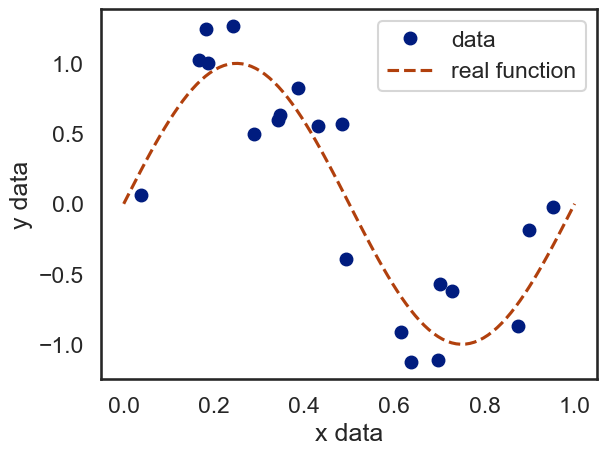

In [5]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');


## Question 2

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
*   Fit this data using linear regression.
*   Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


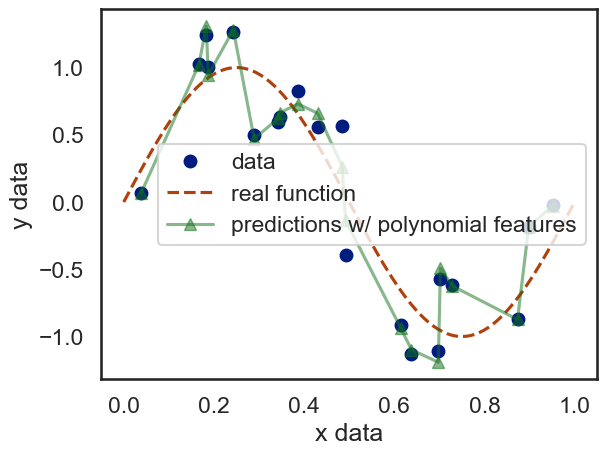

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = data[['x']]
Y_data = data['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


## Question 3

*   Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plot the results, as was done in Question 1.
*   Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?


In [19]:
# Import matplotlib for plotting and visualization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridgeR = Ridge(alpha=1.0)                 
ridgeR.fit(X_poly, Y_pred)                        

lassoR = Lasso(alpha=1.0)
lassoR.fit(X_poly, Y_pred)



,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [23]:
# Let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = ridgeR.coef_.ravel()
coefficients['lasso regression'] = lassoR.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression


C:\Users\levin\AppData\Local\Temp\ipykernel_19872\3223727542.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefficients = coefficients.applymap(abs)


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.0
mean,2.426388e+11,0.206059,0.0
std,2.707907e+11,0.205514,0.0
min,1.866316e+06,0.000000,0.0
25%,3.074914e+10,0.123665,0.0
50%,1.257762e+11,0.147985,0.0
75%,3.629261e+11,0.165865,0.0
max,9.193628e+11,0.791461,0.0


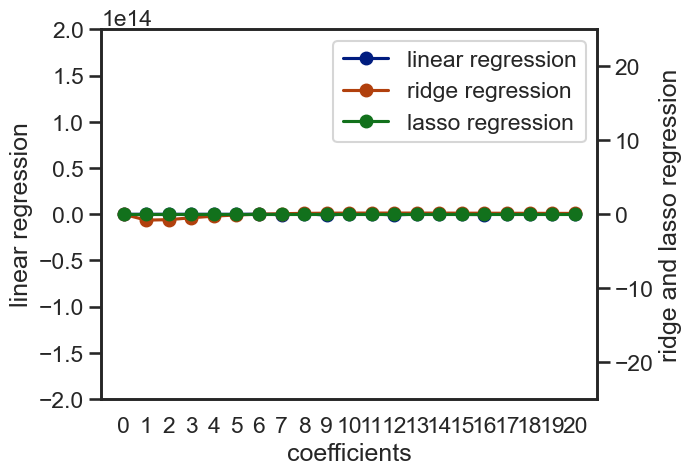

In [25]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot( ridgeR.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassoR.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

*   Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
*   Split the data into train and test sets.
*   Log transform skewed features.
*   Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.


In [26]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.


In [29]:
data =pd.get_dummies(data, drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=241)

Next, split the data in train and test data sets.


In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.


In [30]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]


In [31]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".


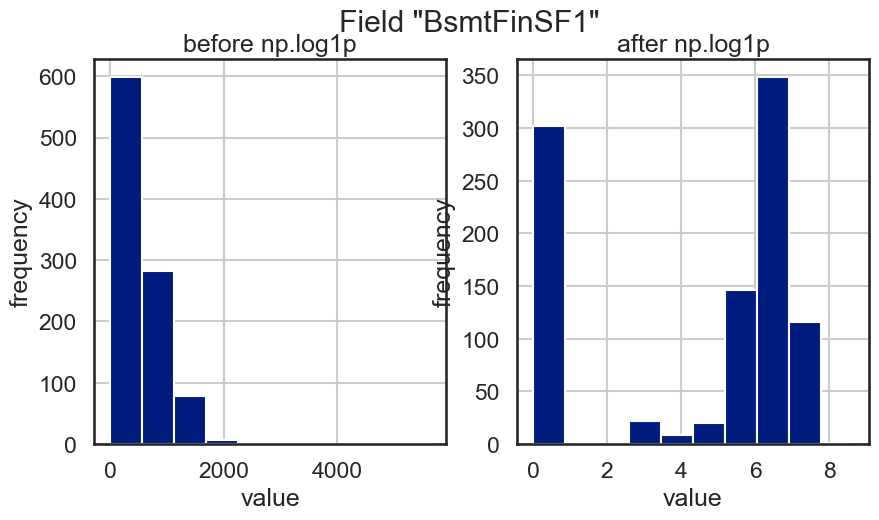

In [32]:
# Create visualization: OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# a little bit better


In [33]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing


Separate features from predictor.


In [34]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

## Question 5

*   Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.


In [35]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

*   Fit a basic linear regression model
*   print the root-mean-squared error for this model
*   plot the predicted vs actual sale price based on the model.


In [36]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

42033.49215279937


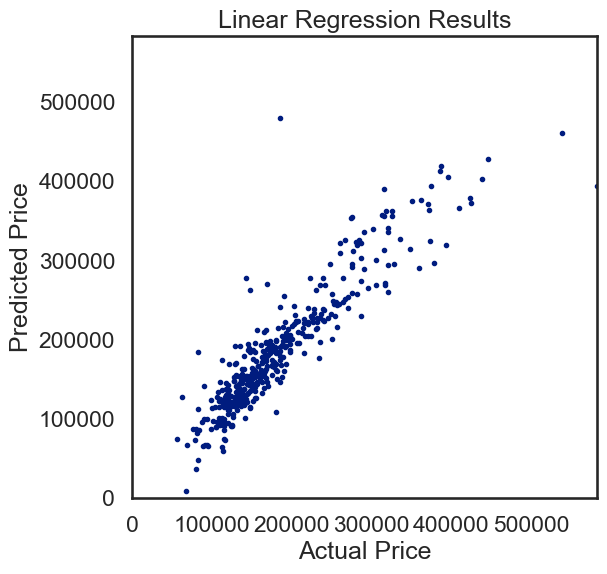

In [37]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

*   Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
*   Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
*   Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.


In [38]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

10.0 32022.031469901285


## Question 7

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

*   Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
*   Repeat this with the Elastic net model.
*   Compare the results via table and/or plot.

Use the following alphas:\
`[1e-5, 5e-5, 0.0001, 0.0005]`


In [39]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=int(5e4),
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+10, tolerance: 3.871e+08
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+10, tolerance: 3.871e+08
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, che

0.0005 46069.63857009711


c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+11, tolerance: 6.103e+08
  model = cd_fast.enet_coordinate_descent(


We can determine how many of these features remain non-zero.


In [40]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 240 coefficients, 230 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1\_ratios between 0.1 and 0.9


In [41]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=int(1e4)).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.667e+11, tolerance: 4.874e+08
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+11, tolerance: 4.652e+08
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, che

0.0005 0.1 36040.658584633806


c:\Users\levin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+11, tolerance: 4.884e+08
  model = cd_fast.enet_coordinate_descent_gram(


Comparing the RMSE calculation from all models is easiest in a table.


In [42]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,42033.492153
Ridge,32022.031470
Lasso,46069.638570
ElasticNet,36040.658585


We can also make a plot of actual vs predicted housing prices as before.


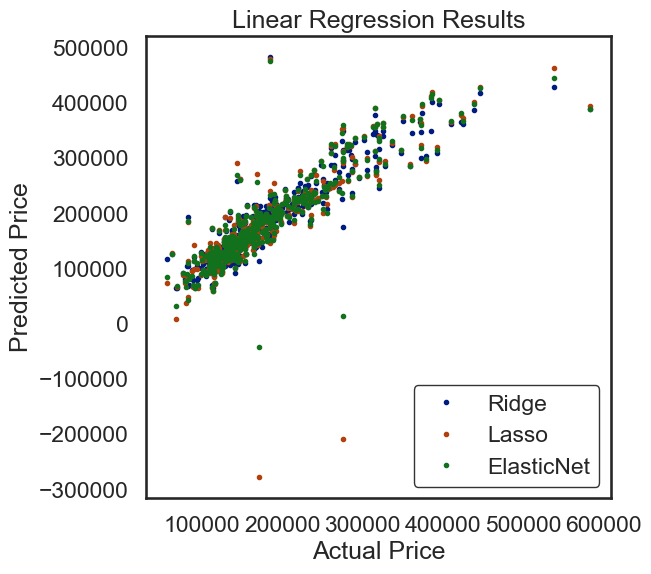

In [43]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

## Question 8

Let's explore Stochastic gradient descent in this exercise.\
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.\
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

*   Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
*   Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
*   Do not scale the data before fitting the model.
*   Compare the results to those obtained without using stochastic gradient descent.


In [ ]:
# Import pandas for data manipulation


Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

*   Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
*   Re-compute the errors for all the penalties and compare.


In [45]:
# Import pandas for data manipulation
model_parameters_dict = {
    'model1': {'alpha': 0.01, 'max_iter': 1000},
    'model2': {'alpha': 0.001, 'max_iter': 1500},
    'model3': {'alpha': 0.1, 'max_iter': 2000}
}

Now let's scale our training data and try again.

*   Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
*   Using the scaler, transform `X_test` and create a variable `X_test_scaled`.
*   Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD-scaled
Linear,42033.492153,NaN
Ridge,32022.031470,NaN
Lasso,46069.638570,NaN
ElasticNet,36040.658585,NaN


In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD-scaled
Linear,42033.492153,NaN
Ridge,32022.031470,NaN
Lasso,46069.638570,NaN
ElasticNet,36040.658585,NaN


***

### Machine Learning Foundation (C) 2020 IBM Corporation
